In [1]:
## This script is to read the data from RMSE_PWV_cyc2detr_CALC.ipynb
## and plot them accordingly. IT IS MICROPHYS EXPERIMENTS
## Created by C. Bayu Risanto, S.J. (6 December 2024)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy.io import loadmat
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib as mplt
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.ticker as mticker
import matplotlib.colors
import glob
from datetime import date, datetime, timedelta
def date_range_list(start_date, end_date):
    # Return list of datetime.date objects (inclusive) between start_date and end_date (inclusive).
    date_list = []
    curr_date = start_date
    while curr_date <= end_date:
        date_list.append(curr_date)
        curr_date += timedelta(hours=1)
    return date_list

In [2]:
pathd = '/home/bayu/DATA/ARIZONA_PRO/WRF_EXTR/WRF_OUT/'
d_exp1 = '20210815_06Z_40mem_0035_6cyc_newFtr_assim'
d_exp2 = '20210815_06Z_40mem_06Z_0035_6cyc_noassim'
d_exp3 = '20210815_06Z_mc16_40mem_0035_6cyc_assim'
d_exp4 = '20210815_06Z_mc16_40mem_0035_6cyc_noassim'
d_exp5 = '20210815_06Z_mc09_40mem_0035_6cyc_assim'
d_exp6 = '20210815_06Z_mc09_40mem_0035_6cyc_noassim'
d_exp7 = '20210815_06Z_mc40_40mem_0035_6cyc_assim'
d_exp8 = '20210815_06Z_mc40_40mem_0035_6cyc_noassim'
d_exp9 = '20210815_06Z_mc28_40mem_0035_6cyc_assim'
d_exp10 = '20210815_06Z_mc28_40mem_0035_6cyc_noassim'
d_exp11 = '20210815_06Z_mc08_40mem_002_6cyc_assim'
d_exp12 = '20210815_06Z_mc08_40mem_002_6cyc_noassim'
d_exp13 = '20210815_06Z_40mem_005_6cyc_newFtr_assim'
dat1 = loadmat(pathd+d_exp1+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat2 = loadmat(pathd+d_exp2+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat3 = loadmat(pathd+d_exp3+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat4 = loadmat(pathd+d_exp4+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat5 = loadmat(pathd+d_exp5+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat6 = loadmat(pathd+d_exp6+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat7 = loadmat(pathd+d_exp7+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat8 = loadmat(pathd+d_exp8+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat9 = loadmat(pathd+d_exp9+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat10 = loadmat(pathd+d_exp10+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat11 = loadmat(pathd+d_exp11+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat12 = loadmat(pathd+d_exp12+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
dat13 = loadmat(pathd+d_exp13+'/'+'PWV_obs_fct_CYC+DTR_sta.mat')
Obs_pwv_06 = dat1['Obs_pwv']
time_06 = dat2['time']
Fct_exp1 = dat1['Fct_pwv']
Fct_exp2 = dat2['Fct_pwv']
Fct_exp3 = dat3['Fct_pwv']
Fct_exp4 = dat4['Fct_pwv']
Fct_exp5 = dat5['Fct_pwv']
Fct_exp6 = dat6['Fct_pwv']
Fct_exp7 = dat7['Fct_pwv']
Fct_exp8 = dat8['Fct_pwv']
Fct_exp9 = dat9['Fct_pwv']
Fct_exp10 = dat10['Fct_pwv']
Fct_exp11 = dat11['Fct_pwv']
Fct_exp12 = dat12['Fct_pwv']
Fct_exp13 = dat13['Fct_pwv']
## create time
st_time = datetime.fromisoformat('2021-08-15_06')
en_time = datetime.fromisoformat('2021-08-16_12')
tt1 = date_range_list(st_time,en_time)
st_time = datetime.fromisoformat('2021-08-15_12')
tt2 = date_range_list(st_time,en_time)

In [3]:
print(Fct_exp12.shape)

(33, 25)


In [4]:
## get the mean and then the RMSE of all time
isite,itime = Fct_exp1.shape

## stack them together
Fct_a = np.stack((Fct_exp1,Fct_exp2,Fct_exp3,Fct_exp4,Fct_exp5,Fct_exp6,
                  Fct_exp7,Fct_exp8,Fct_exp9,Fct_exp10,Fct_exp11,Fct_exp12,Fct_exp13)); #print(Fct_a.shape)

rmse_a = [[np.sqrt(np.nansum((Obs_pwv_06[:,i] - Fct_a[j,:,i])**2) / np.sum(~np.isnan(Obs_pwv_06[:,i]))) 
           for i in range(itime)] for j in range(13)]
rmse_a = np.asarray(rmse_a)

In [5]:
## Get the pwv bias
isite,itime = Fct_exp1.shape
dif_a = [[Fct_a[j,:,i] - Obs_pwv_06[:,i] for i in range(itime)] for j in range(13)]
dif_a = np.asarray(dif_a)
mu_dif_a = np.nanmean(dif_a,axis=2)

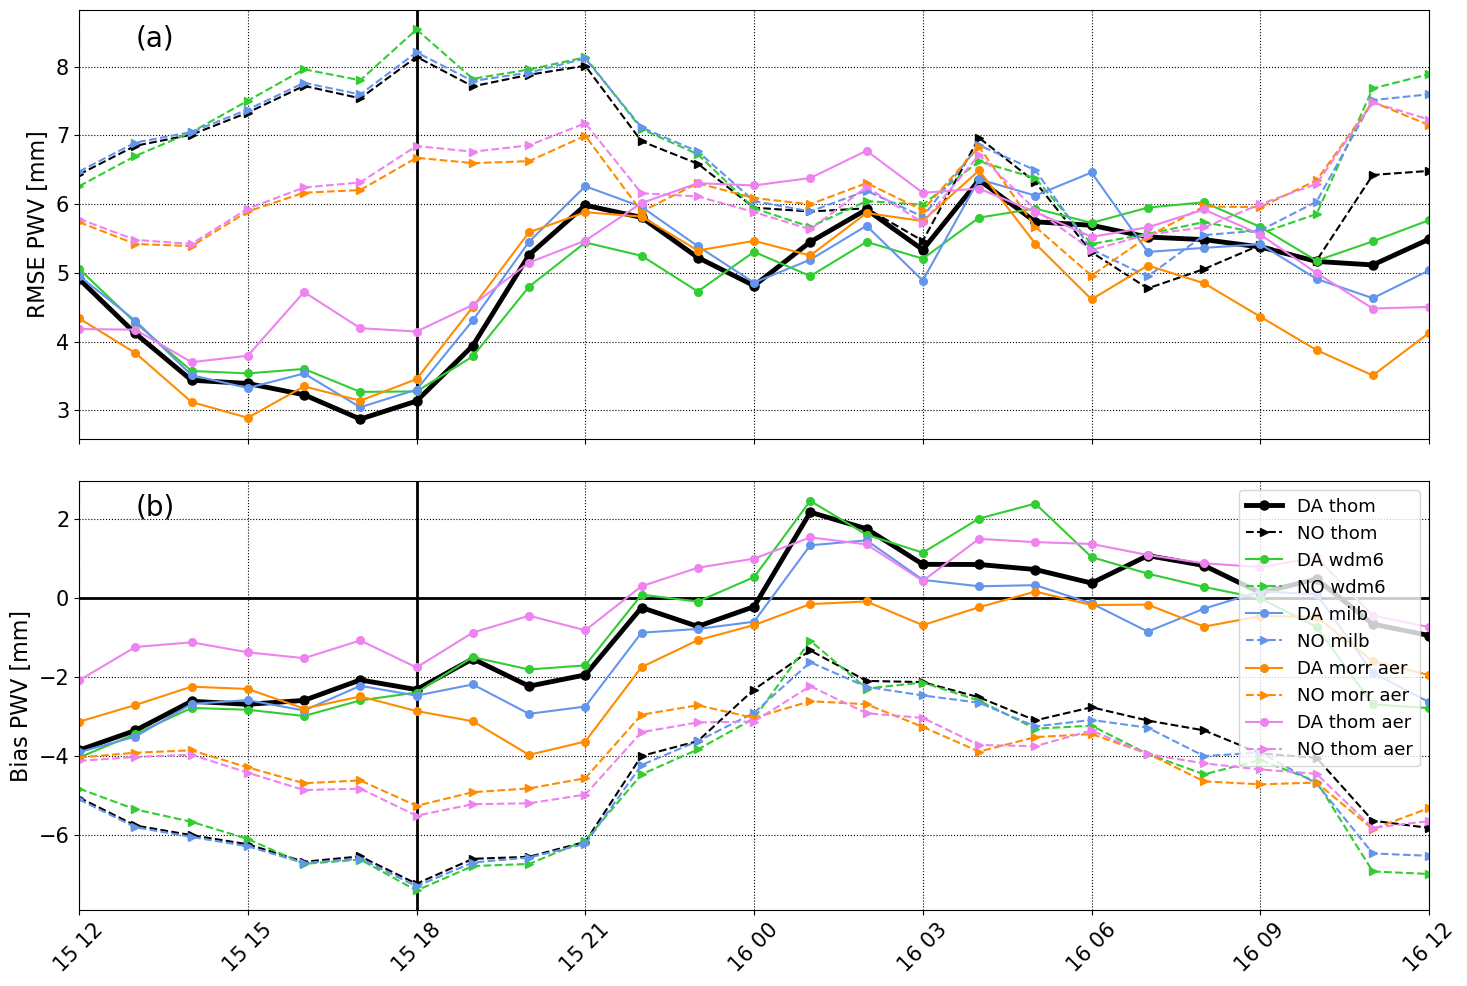

In [20]:
## PLOT microphys test
x = np.arange(0,11,1)
msz = 5.5

fig = plt.figure(1,figsize=(15, 10))
plt.subplot(211) 
plt.plot(tt2,rmse_a[0,:],'k',marker='o',markersize=6.5,linewidth=3.5)
plt.plot(tt2,rmse_a[1,:],'--k',marker='>',markersize=msz)
plt.plot(tt2,rmse_a[2,:],'limegreen',marker='o',markersize=msz)
plt.plot(tt2,rmse_a[3,:],'limegreen',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,rmse_a[4,:],'cornflowerblue',marker='o',markersize=msz)
plt.plot(tt2,rmse_a[5,:],'cornflowerblue',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,rmse_a[6,:],'darkorange',marker='o',markersize=msz)
plt.plot(tt2,rmse_a[7,:],'darkorange',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,rmse_a[8,:],'violet',marker='o',markersize=msz)
plt.plot(tt2,rmse_a[9,:],'violet',marker='>',markersize=msz,linestyle='dashed')
plt.annotate('(a)',xy=(mdates.date2num(tt2[1]),8.3),fontsize=20)

plt.axvline(tt2[6],color='black',zorder=0, linewidth=2)
plt.tick_params('x', labelbottom=False)
plt.xlim([tt2[0], tt2[24]])
plt.grid(color='black', linestyle='dotted')
plt.ylabel('RMSE PWV [mm]',fontsize=16)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)

ax = plt.subplot(212)
plt.plot(tt2,mu_dif_a[0,:],'k',marker='o',markersize=6.5,linewidth=3.5)
plt.plot(tt2,mu_dif_a[1,:],'--k',marker='>',markersize=msz)
plt.plot(tt2,mu_dif_a[2,:],'limegreen',marker='o',markersize=msz)
plt.plot(tt2,mu_dif_a[3,:],'limegreen',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,mu_dif_a[4,:],'cornflowerblue',marker='o',markersize=msz)
plt.plot(tt2,mu_dif_a[5,:],'cornflowerblue',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,mu_dif_a[6,:],'darkorange',marker='o',markersize=msz)
plt.plot(tt2,mu_dif_a[7,:],'darkorange',marker='>',markersize=msz,linestyle='dashed')
plt.plot(tt2,mu_dif_a[8,:],'violet',marker='o',markersize=msz)
plt.plot(tt2,mu_dif_a[9,:],'violet',marker='>',markersize=msz,linestyle='dashed')
plt.annotate('(b)',xy=(mdates.date2num(tt2[1]),2.1),fontsize=20)

plt.axhline(y=0,color='black',zorder=0, linewidth=2) ; plt.axvline(tt2[6],color='black',zorder=0, linewidth=2)   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
plt.xlim([tt2[0], tt2[24]])
plt.grid(color='black', linestyle='dotted')
#ax1.set_title('Init 2021 08 15 06',fontsize=16)
plt.ylabel('Bias PWV [mm]',fontsize=16)
plt.legend(['DA thom','NO thom','DA wdm6','NO wdm6','DA milb','NO milb','DA morr aer','NO morr aer',
            'DA thom aer','NO thom aer'],loc=1,fontsize=13)
    

plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.0, 
                    hspace= 0.1)

## SAVE
dir_out = '/home/bayu/PLOTS/ARIZONA_PRO/PWV/'
plotfile  = 'PWV_RMSE-BIAS_cyc2detr_test_microphys.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

plt.show()
plt.close()

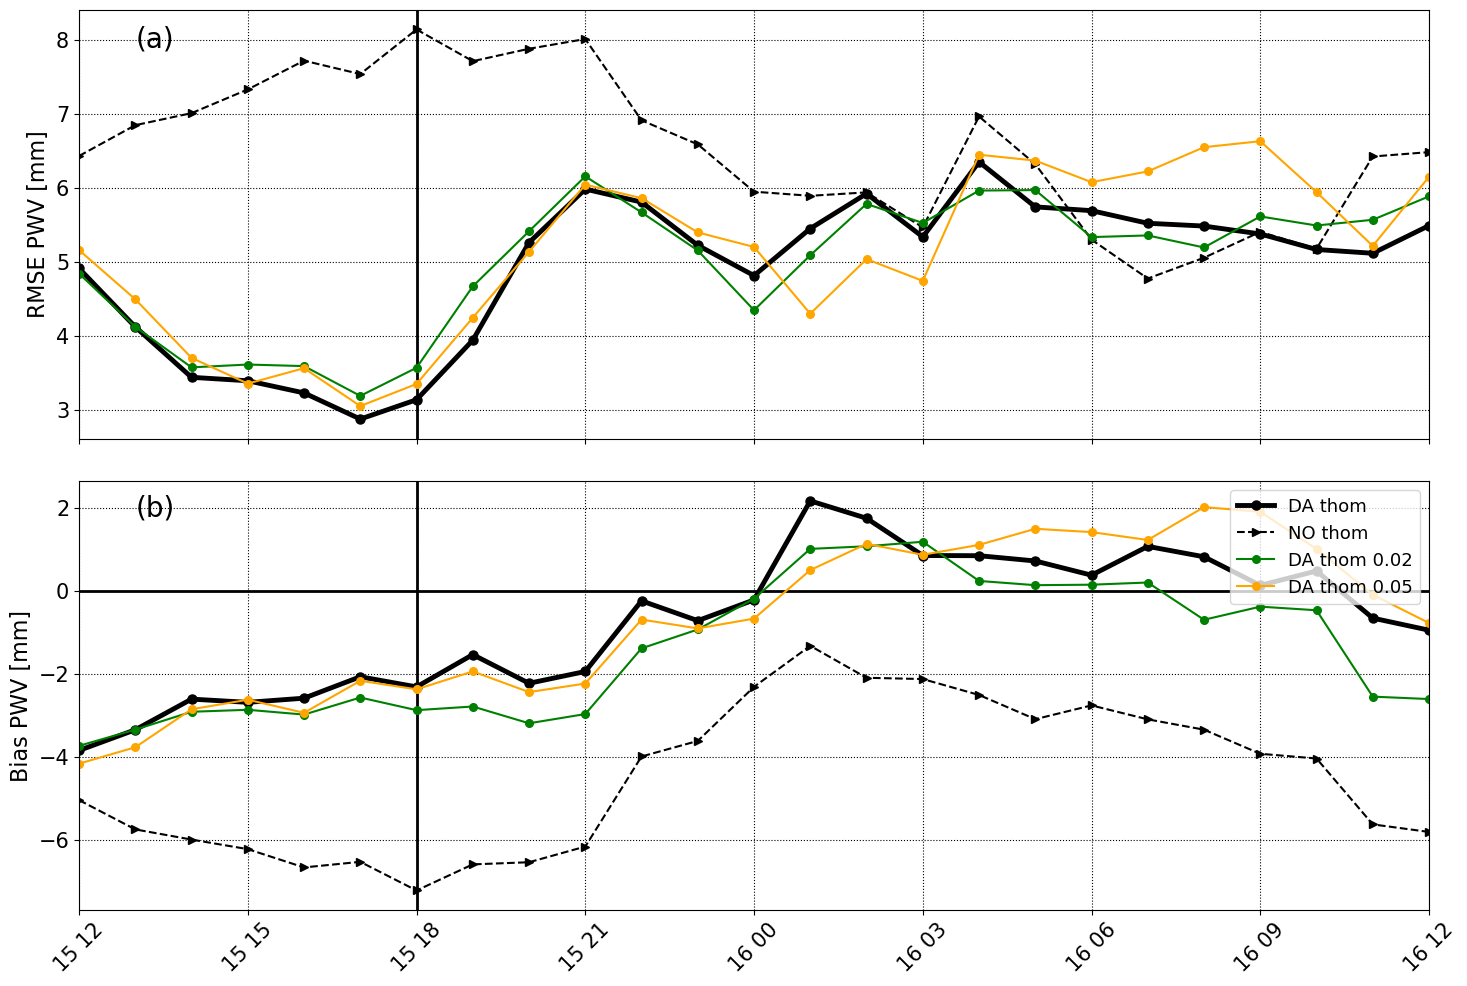

In [21]:
## PLOT cutoff test
x = np.arange(0,11,1)
msz = 5.5

fig = plt.figure(1,figsize=(15, 10))
plt.subplot(211) 
plt.plot(tt2,rmse_a[0,:],'k',marker='o',markersize=6.5,linewidth=3.5)
plt.plot(tt2,rmse_a[1,:],'--k',marker='>',markersize=msz)
plt.plot(tt2,rmse_a[10,:],'g',marker='o',markersize=msz)
plt.plot(tt2,rmse_a[12,:],'orange',marker='o',markersize=msz)
plt.axvline(tt2[6],color='black',zorder=0, linewidth=2)
plt.tick_params('x', labelbottom=False)
plt.xlim([tt2[0], tt2[24]])
plt.grid(color='black', linestyle='dotted')
plt.ylabel('RMSE PWV [mm]',fontsize=16)
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
plt.annotate('(a)',xy=(mdates.date2num(tt2[1]),7.9),fontsize=20)

ax = plt.subplot(212)
plt.plot(tt2,mu_dif_a[0,:],'k',marker='o',markersize=6.5,linewidth=3.5)
plt.plot(tt2,mu_dif_a[1,:],'--k',marker='>',markersize=msz)
plt.plot(tt2,mu_dif_a[10,:],'green',marker='o',markersize=msz)
plt.plot(tt2,mu_dif_a[12,:],'orange',marker='o',markersize=msz)
plt.axhline(y=0,color='black',zorder=0, linewidth=2) ; plt.axvline(tt2[6],color='black',zorder=0, linewidth=2)   
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H'))
plt.xlim([tt2[0], tt2[24]])
plt.grid(color='black', linestyle='dotted')
#ax1.set_title('Init 2021 08 15 06',fontsize=16)
plt.ylabel('Bias PWV [mm]',fontsize=16)
plt.annotate('(b)',xy=(mdates.date2num(tt2[1]),1.8),fontsize=20)

plt.legend(['DA thom','NO thom','DA thom 0.02','DA thom 0.05'],loc=1,fontsize=13)
    

plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)

#fig.tight_layout()
plt.subplots_adjust(left=0.0,
                    bottom=0.0, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.0, 
                    hspace= 0.1)

## SAVE
dir_out = '/home/bayu/PLOTS/ARIZONA_PRO/PWV/'
plotfile  = 'PWV_RMSE-BIAS_cyc2detr_test_cutoff.png'
sf = fig.savefig(dir_out+plotfile, dpi=300, bbox_inches='tight')

plt.show()
plt.close()